In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mztMH4jfnVFlxWjJJxWk")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
dataset = project.version(4).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing 

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov8:: 100%|██████████| 48488/48488 [00:08<00:00, 6056.92it/s]


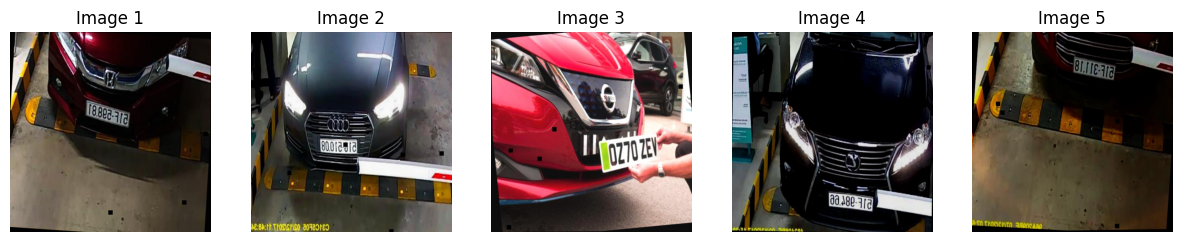

In [2]:
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

# Directory where your training images are located
data_dir = '/content/License-Plate-Recognition-4/train/images'

# List all files in the directory
image_files = os.listdir(data_dir)

# Select 5 random images
random_images = random.sample(image_files, 5)

# Set up a 2x3 grid for displaying the images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Loop through and display the selected images
for i, image_file in enumerate(random_images):
    image_path = os.path.join(data_dir, image_file)
    image = imread(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f'Image {i+1}')
    axes[i].axis('off')

plt.show()

In [4]:
# now install ultralytics
# !pip install ultralytics

In [5]:
# read data.yaml
%cat /content/License-Plate-Recognition-4/data.yaml

names:
- License_Plate
nc: 1
roboflow:
  license: CC BY 4.0
  project: license-plate-recognition-rxg4e
  url: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/4
  version: 4
  workspace: roboflow-universe-projects
test: /content/License-Plate-Recognition-4/test/images
train: /content/License-Plate-Recognition-4/train/images
val: /content/License-Plate-Recognition-4/valid/images


In [6]:
# install and check
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display,Image

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.3/78.2 GB disk)


In [8]:
#Train Model
!yolo task=detect mode=train model=yolov8s.pt data=/content/License-Plate-Recognition-4/data.yaml patience=5 epochs=11 imgsz=450 batch=84 plots=True

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/License-Plate-Recognition-4/data.yaml, epochs=11, patience=5, batch=84, imgsz=450, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscrip

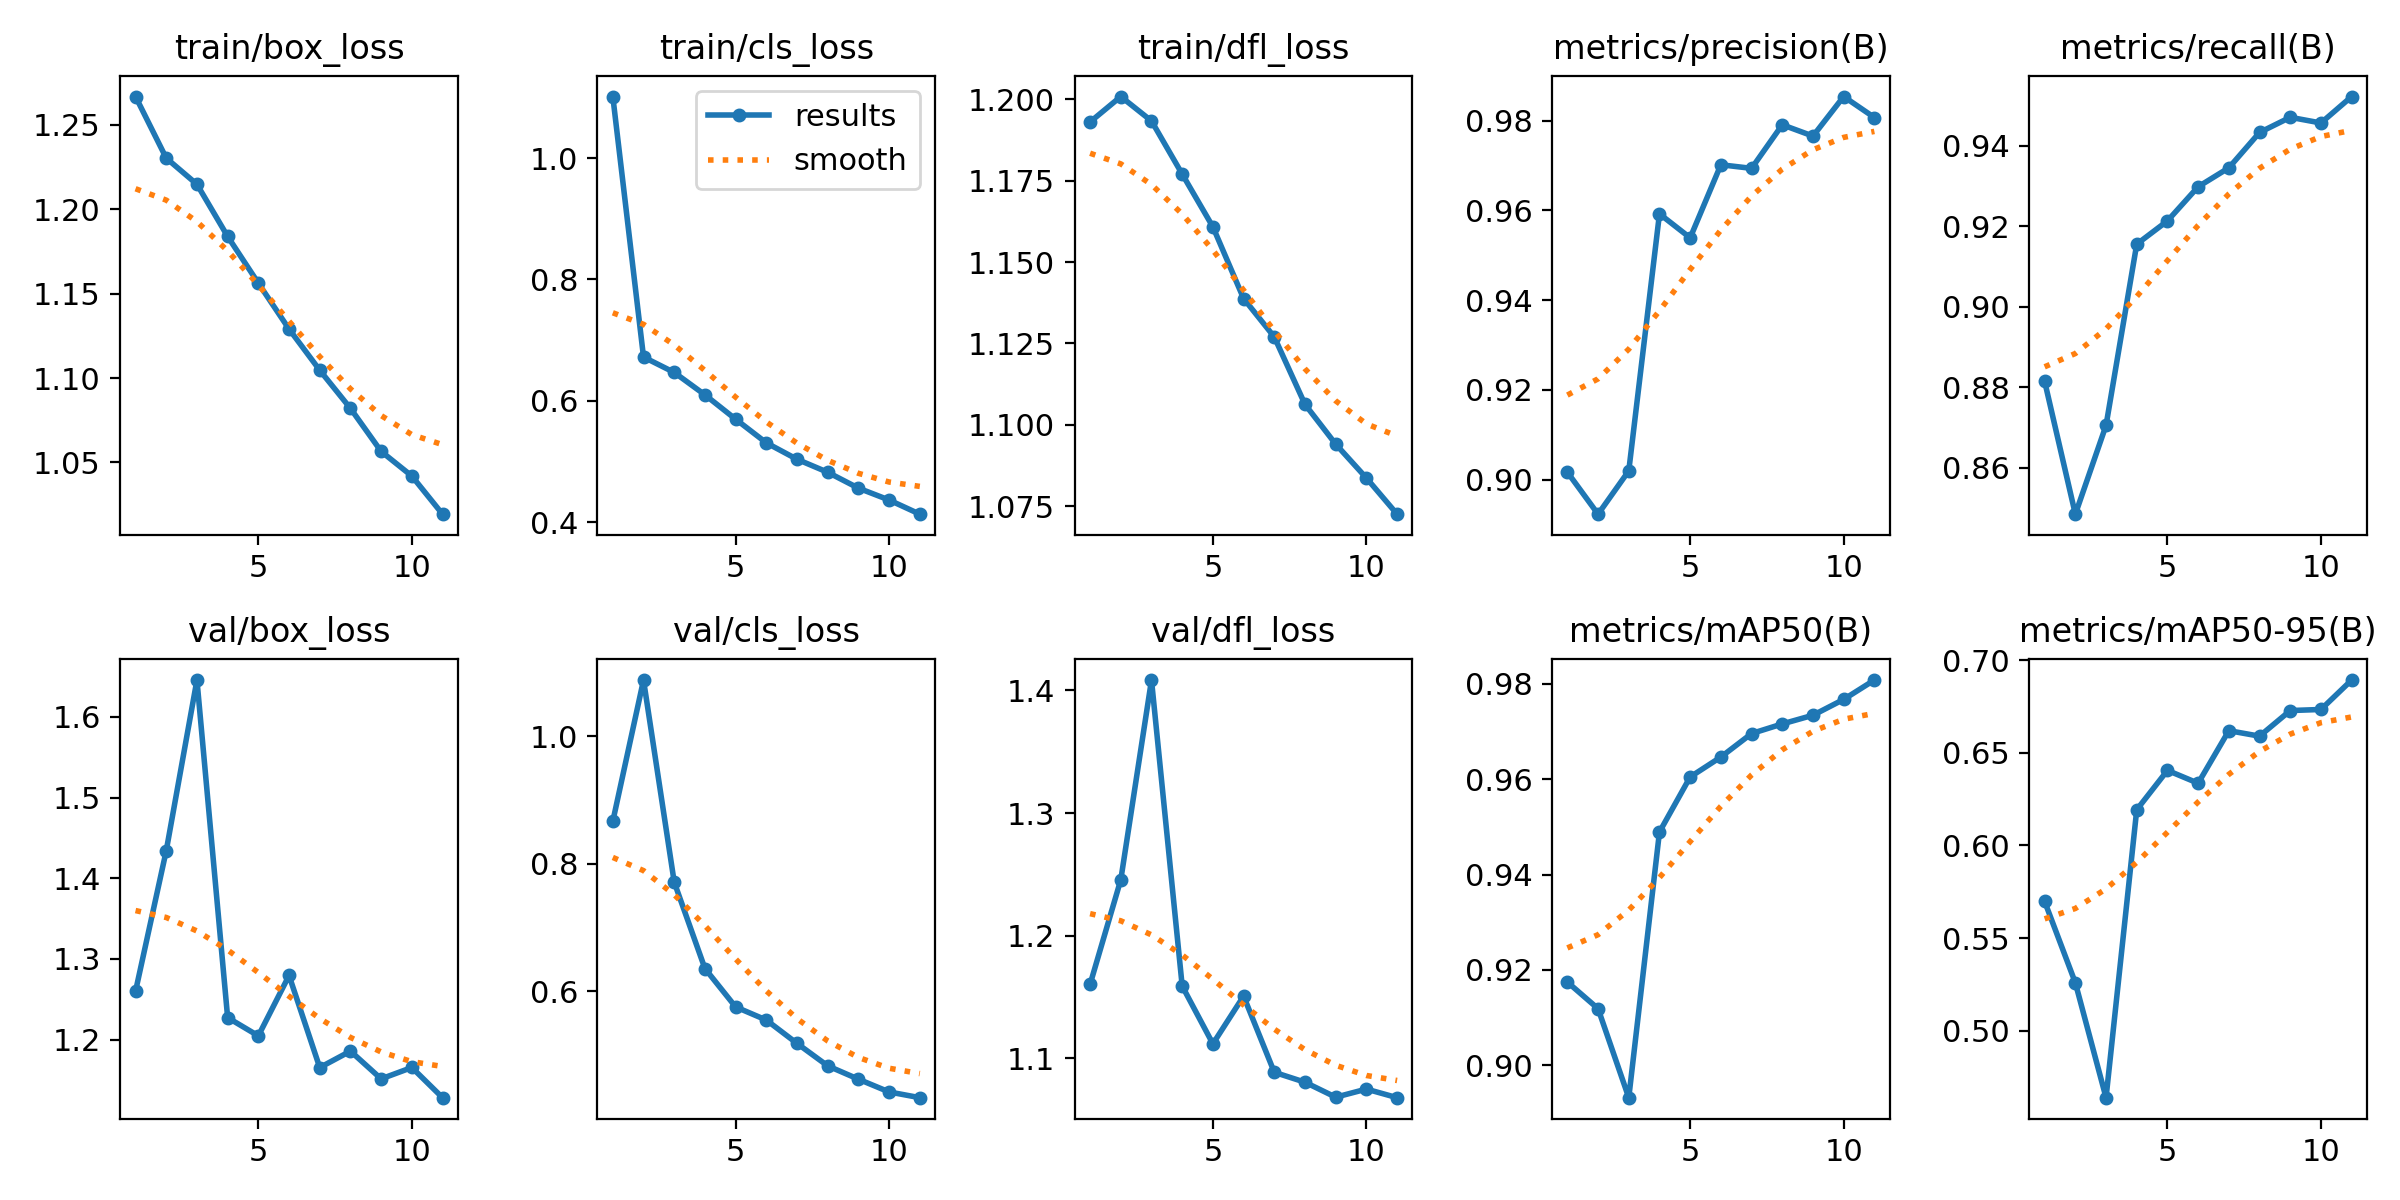

In [10]:
# plot matrices
Image(filename="/content/runs/detect/train2/results.png",width=600)

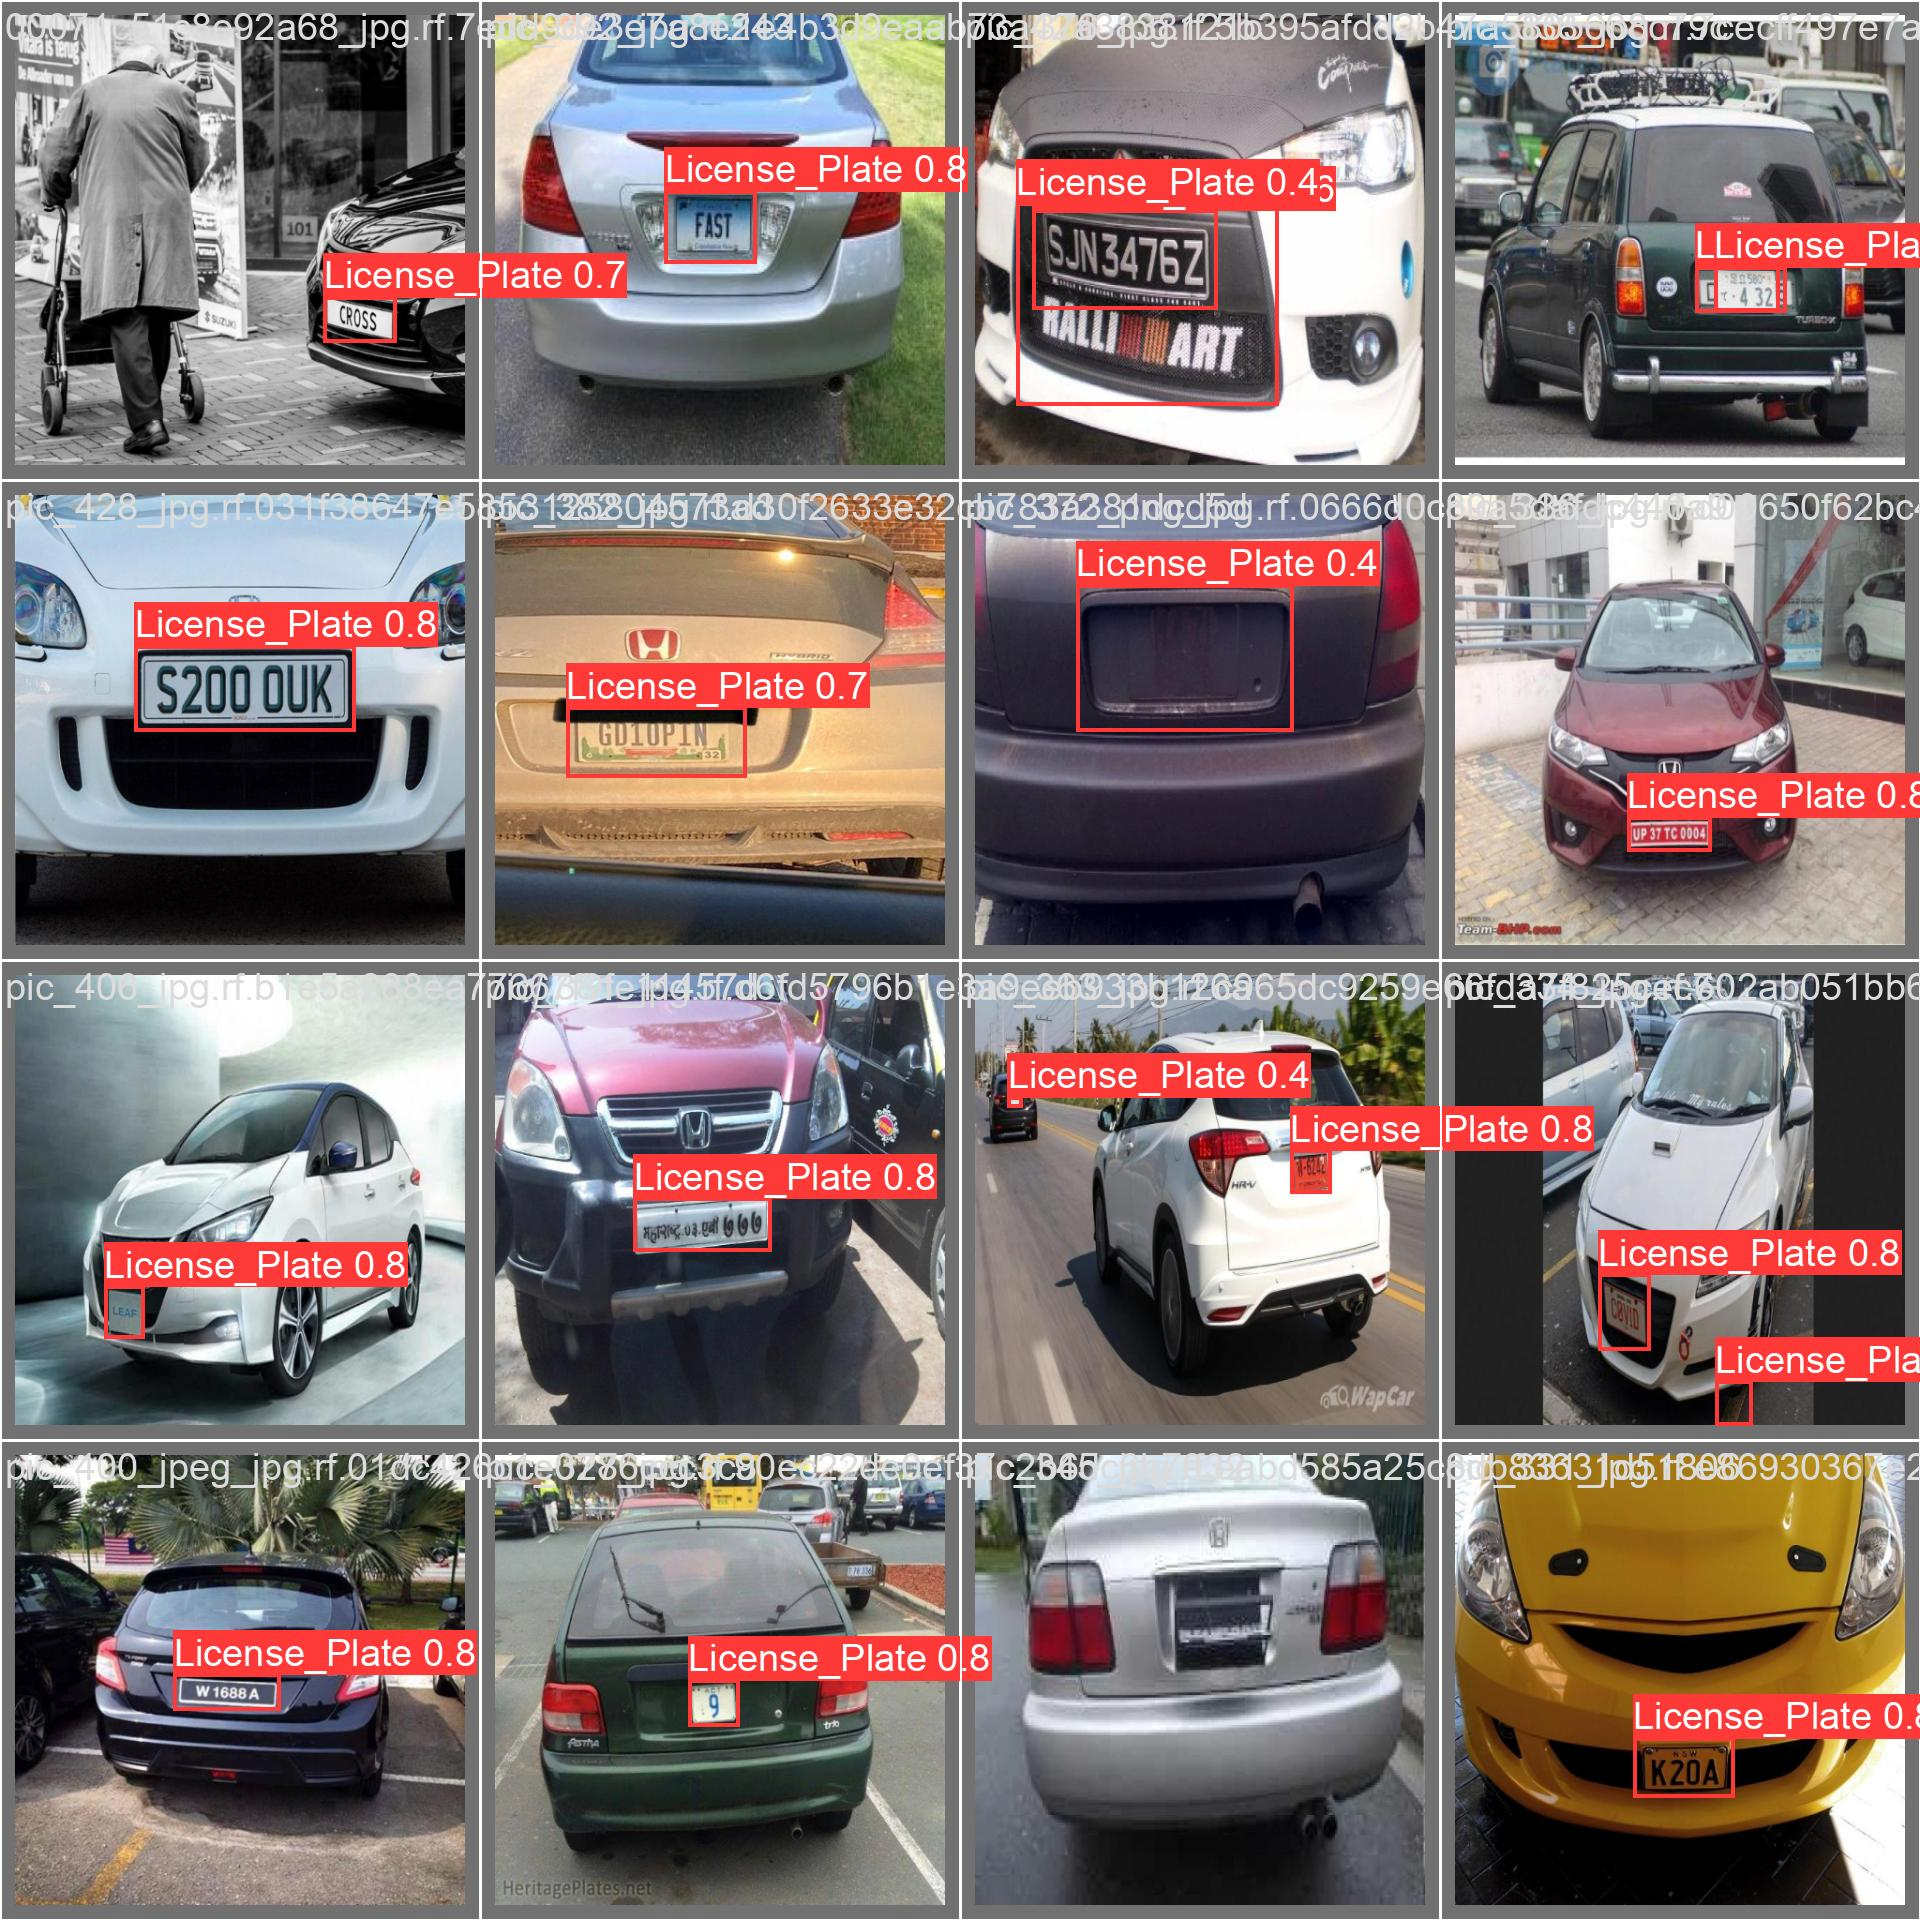

In [13]:
# see the prediction
Image(filename="/content/runs/detect/train2/val_batch0_pred.jpg",width=600)

In [14]:
# now predict on test images
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt data=/content/License-Plate-Recognition-4/data.yaml conf=0.15 source=/content/License-Plate-Recognition-4/test/images

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1019 /content/License-Plate-Recognition-4/test/images/0002a5b67e5f0909_jpg.rf.07ca41e79eb878b14032f650f34d0967.jpg: 480x480 2 License_Plates, 10.7ms
image 2/1019 /content/License-Plate-Recognition-4/test/images/000812dcf304a8e7_jpg.rf.559f904bc045f68ee947796a1b561d8f.jpg: 480x480 2 License_Plates, 10.7ms
image 3/1019 /content/License-Plate-Recognition-4/test/images/0010f4c10f7ab07e_jpg.rf.92344aa620e23aacc490273e32343595.jpg: 480x480 1 License_Plate, 10.7ms
image 4/1019 /content/License-Plate-Recognition-4/test/images/001cdd25e148cd36_jpg.rf.eca53e55e3cf5986bcfd95bc277b6438.jpg: 480x480 2 License_Plates, 10.7ms
image 5/1019 /content/License-Plate-Recognition-4/test/images/002519f868563098_jpg.rf.b9450b9265c92d8d3bd96bdfeff635e5.jpg: 480x480 2 License_Plates, 10.8ms
image 6/1019 /content/License-Plate-Recognitio

In [16]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt data=/content/License-Plate-Recognition-4/data.yaml conf=0.15 source=/content/test.jpg

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/test.jpg: 384x480 2 License_Plates, 152.4ms
Speed: 3.0ms preprocess, 152.4ms inference, 143.2ms postprocess per image at shape (1, 3, 384, 480)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


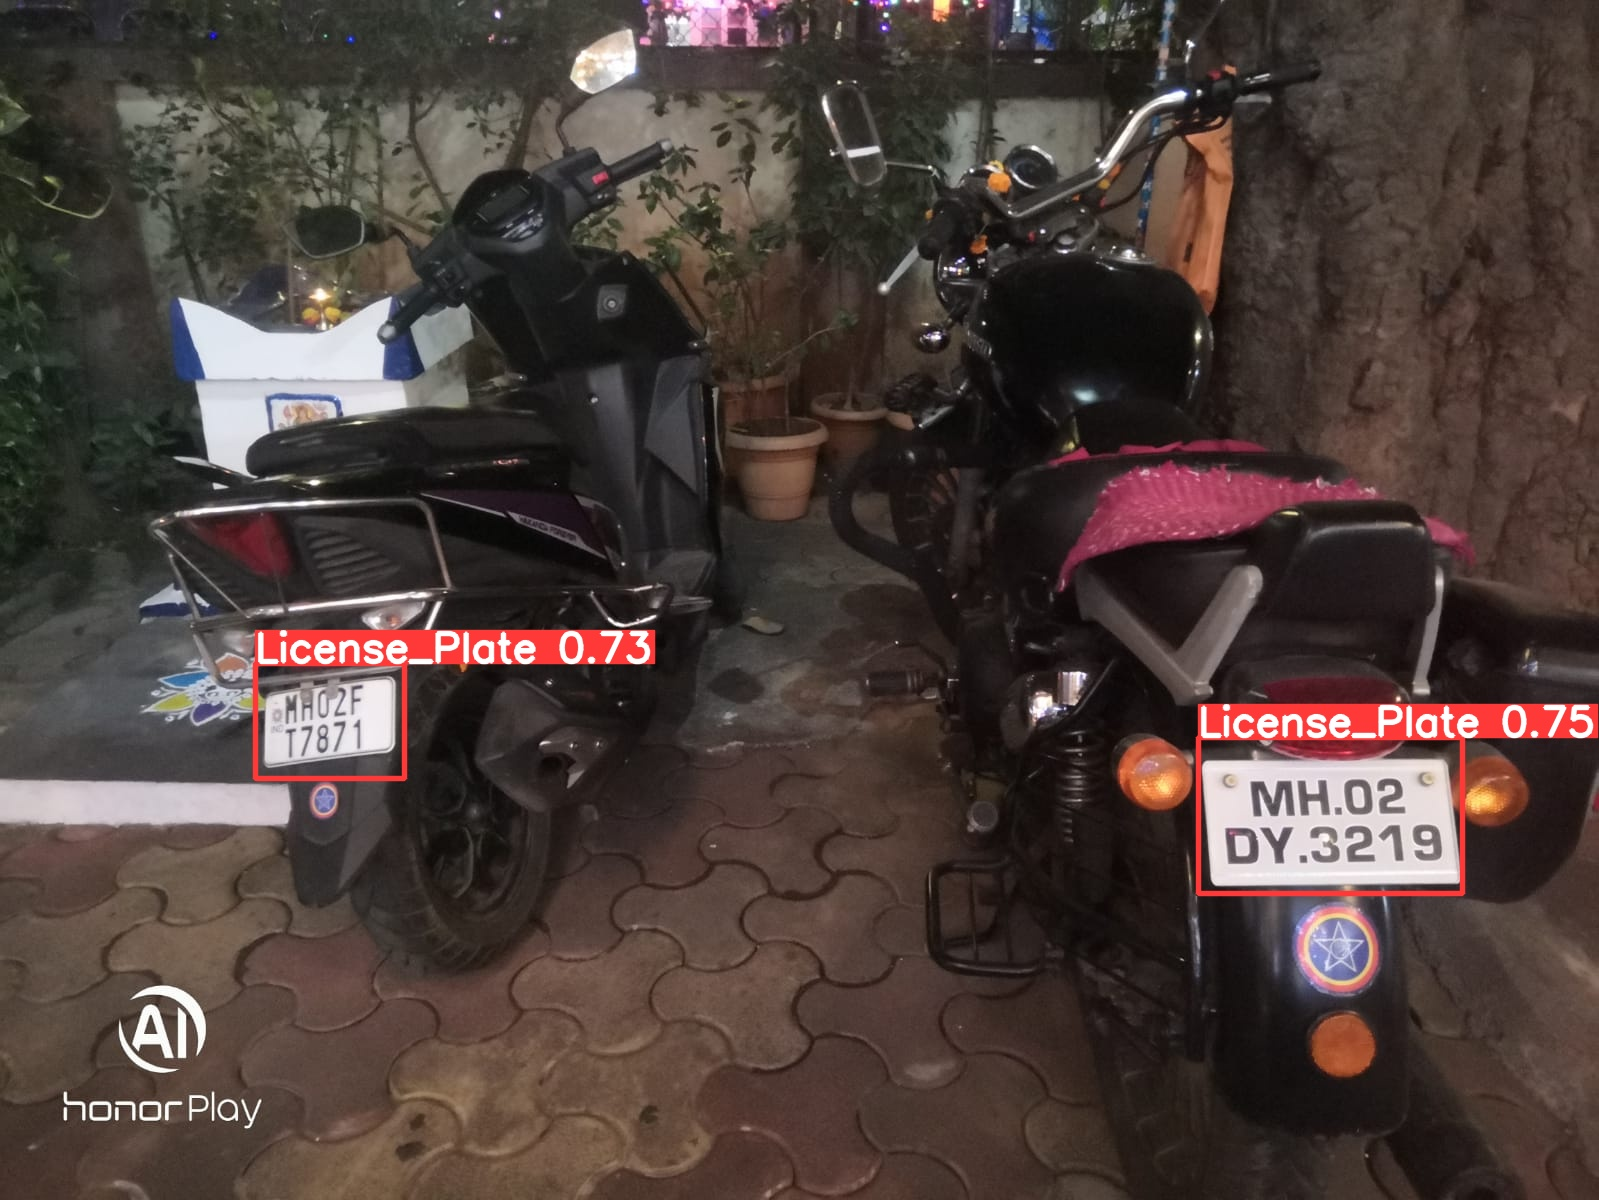

In [17]:
# see the prediction
Image(filename="/content/runs/detect/predict2/test.jpg",width=600)